In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("BlackFriday.csv")

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
df.isnull()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,False,False,False,False,False,False,False,False,False,False,True,False
537573,False,False,False,False,False,False,False,False,False,False,False,False
537574,False,False,False,False,False,False,False,False,False,False,True,False
537575,False,False,False,False,False,False,False,False,False,True,True,False


In [7]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [8]:
del df["Product_Category_2"]
del df["Product_Category_3"]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  object
 2   Gender                      537577 non-null  object
 3   Age                         537577 non-null  object
 4   Occupation                  537577 non-null  int64 
 5   City_Category               537577 non-null  object
 6   Stay_In_Current_City_Years  537577 non-null  object
 7   Marital_Status              537577 non-null  int64 
 8   Product_Category_1          537577 non-null  int64 
 9   Purchase                    537577 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 41.0+ MB


In [10]:
for col in df.columns:
  print(col," ",df[col].nunique())

User_ID   5891
Product_ID   3623
Gender   2
Age   7
Occupation   21
City_Category   3
Stay_In_Current_City_Years   5
Marital_Status   2
Product_Category_1   18
Purchase   17959


In [11]:
len(df[df['Gender'] == 'M'])

405380

In [12]:
data = pd.DataFrame({"Ratio" :[len(df[df['Gender'] == 'M']),len(df[df['Gender'] == 'F'])]}, index = ['Male','female'])


<Axes: ylabel='Ratio'>

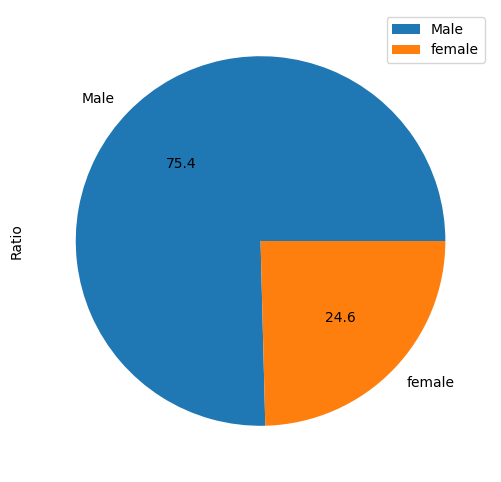

In [13]:
data.plot.pie(y='Ratio',figsize = (6,6), autopct = "%.1f")

<Axes: title={'center': 'Gender Ratio'}>

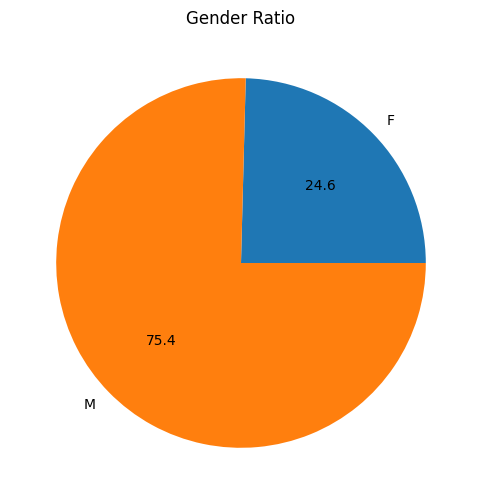

In [14]:

df.groupby('Gender').size().plot(kind="pie",autopct="%.1f",figsize=(6,6),title="Gender Ratio")

<Axes: xlabel='Gender'>

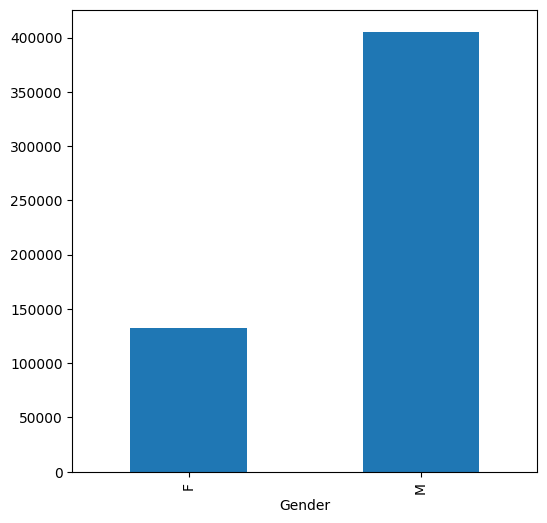

In [15]:
df.groupby('Gender').size().plot(kind="bar",figsize=(6,6))

In [16]:
# df.groupby('Gender').sum()['Purchase']

<Axes: xlabel='Age'>

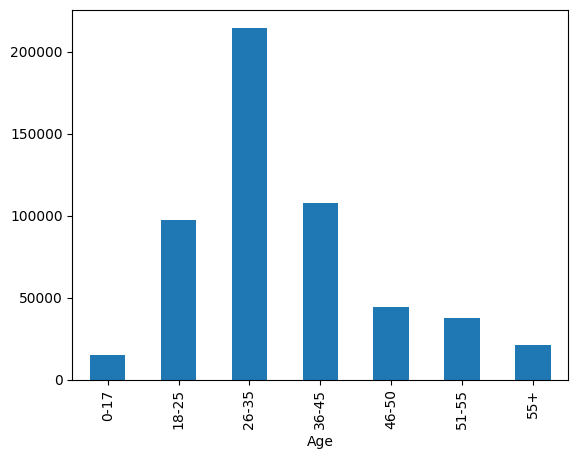

In [17]:
df.groupby('Age').size().plot(kind = 'bar')

In [18]:
for i in df["Age"].unique():
  print(i," : ",len(df[df['Age']==i]))

0-17  :  14707
55+  :  20903
26-35  :  214690
46-50  :  44526
51-55  :  37618
36-45  :  107499
18-25  :  97634


In [19]:
i,"",df[df['Age']==i]['Product_ID'].nunique()

('18-25', '', 3213)

In [20]:
lst = []
for i in df['Age'].unique():
  lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])
data = pd.DataFrame(lst,columns=['Age','Products'])
data


,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: >

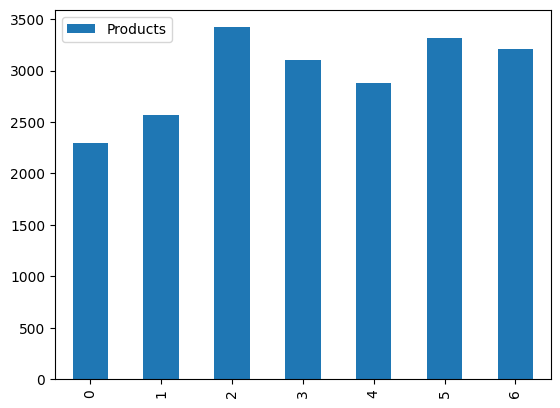

In [21]:
data.plot(kind='bar')

<Axes: xlabel='Age'>

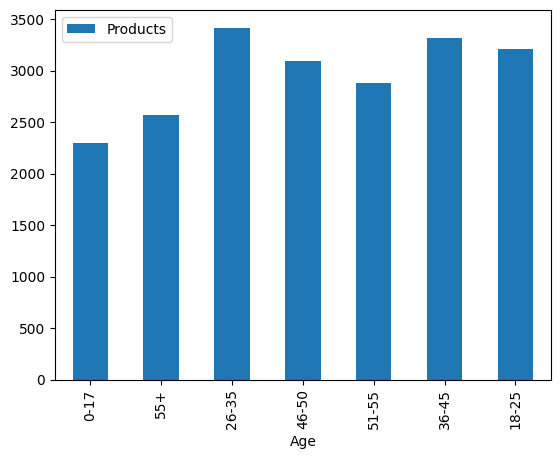

In [22]:
# Age in x-axis
data.plot.bar(x='Age')

In [23]:
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: xlabel='Age'>

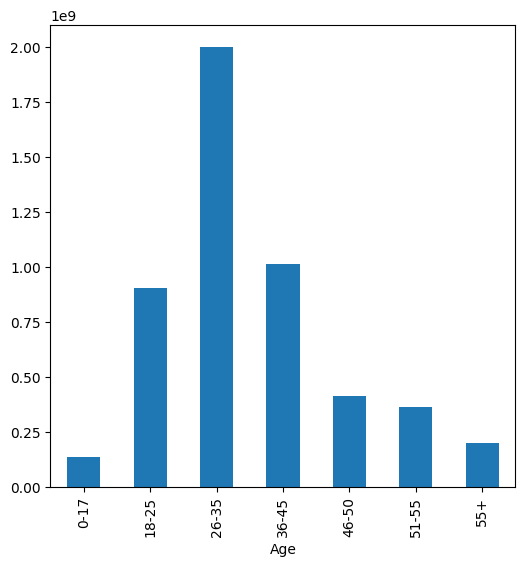

In [24]:
df.groupby('Age').sum()['Purchase'].plot(kind='bar',figsize=(6,6))

<Axes: >

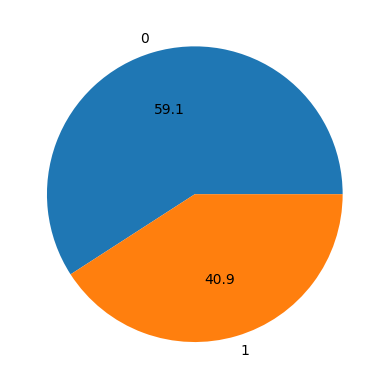

In [25]:
df.groupby('Marital_Status').size().plot(kind = 'pie', autopct='%.1f')

<Axes: >

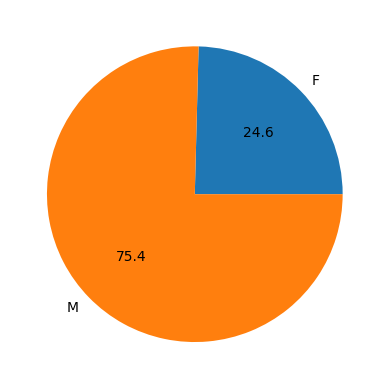

In [26]:
df.groupby('Gender').size().plot(kind = 'pie', autopct='%.1f')


<Axes: xlabel='Age', ylabel='count'>

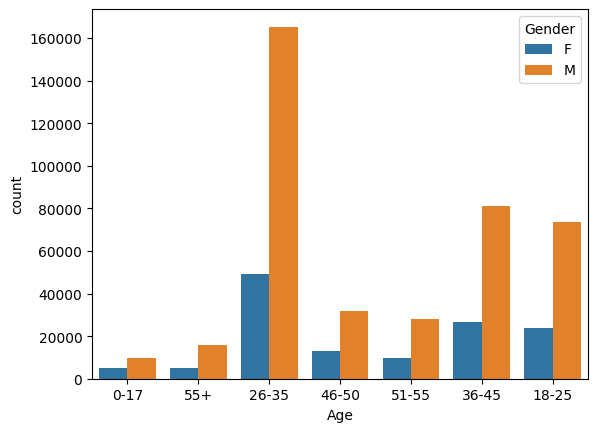

In [27]:
sns.countplot(x='Age',hue='Gender',data=df)

<Axes: xlabel='Gender', ylabel='count'>

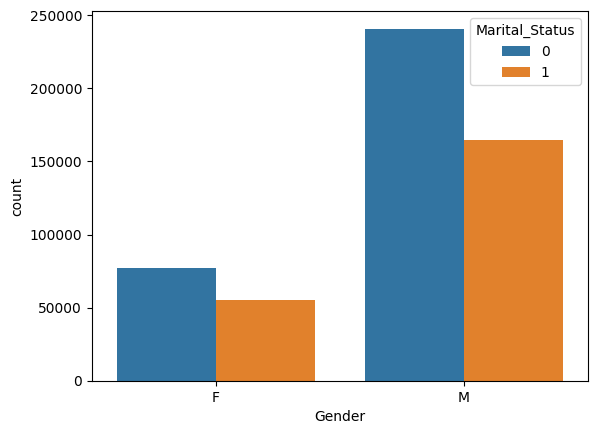

In [28]:
sns.countplot(x='Gender',hue='Marital_Status',data=df)


<Axes: >

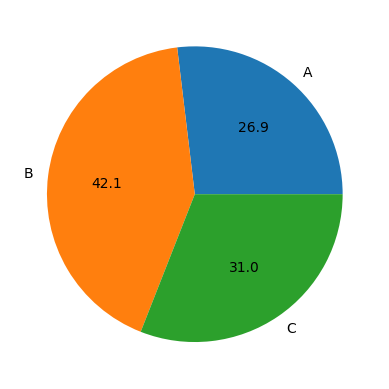

In [29]:
df.groupby('City_Category').size().plot(kind='pie',autopct='%.1f')

<Axes: xlabel='City_Category', ylabel='count'>

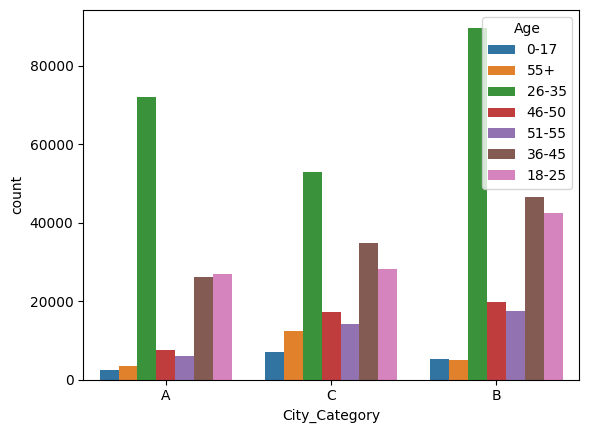

In [30]:
sns.countplot(x='City_Category',hue='Age',data=df)

<Axes: xlabel='Age', ylabel='count'>

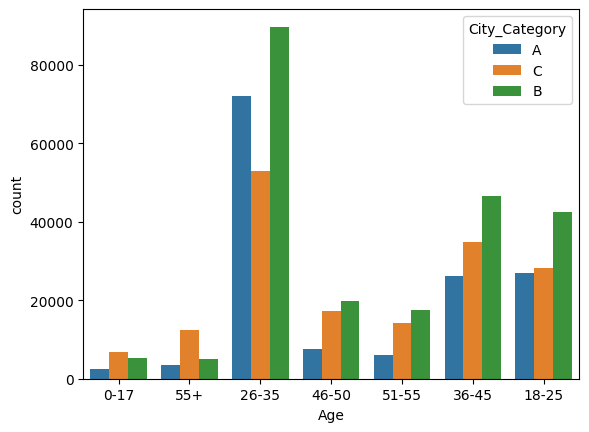

In [34]:
sns.countplot(x='Age',hue='City_Category',data=df)


<Axes: xlabel='City_Category', ylabel='count'>

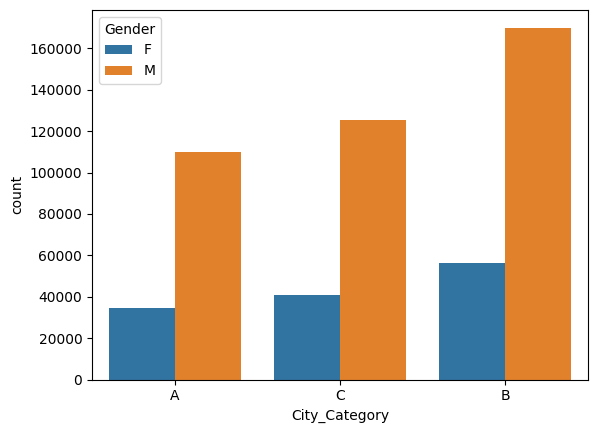

In [35]:
sns.countplot(x='City_Category',hue='Gender',data=df)


<Axes: ylabel='Purchase'>

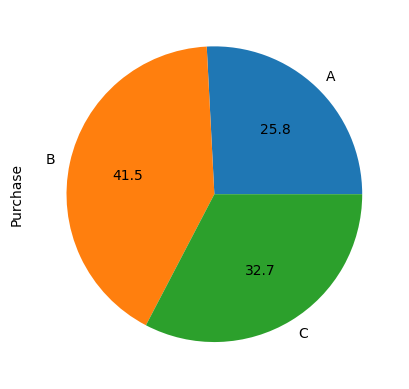

In [36]:
# sns.countplot(x='City_Category',hue='Age',data=df)
df.groupby('City_Category').sum()['Purchase'].plot(kind='pie',autopct='%.1f')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

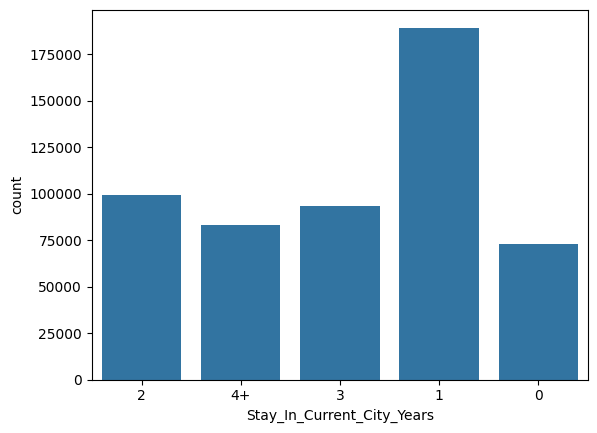

In [37]:
sns.countplot(x=df['Stay_In_Current_City_Years'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

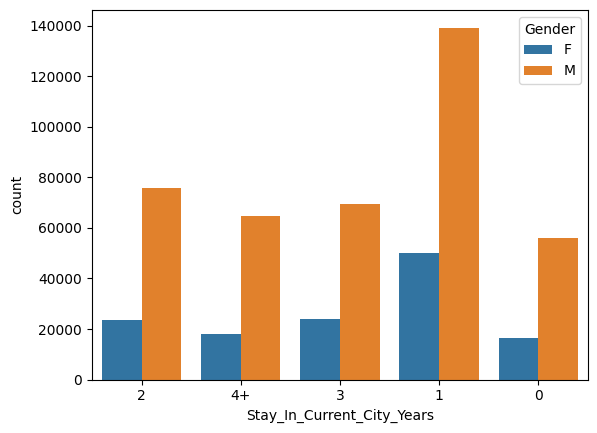

In [38]:
sns.countplot(x='Stay_In_Current_City_Years',hue='Gender',data=df)


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

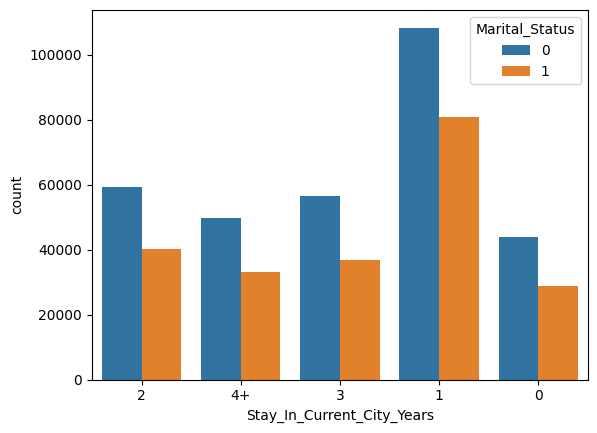

In [39]:
sns.countplot(x='Stay_In_Current_City_Years',hue='Marital_Status',data=df)


<Axes: xlabel='Occupation', ylabel='count'>

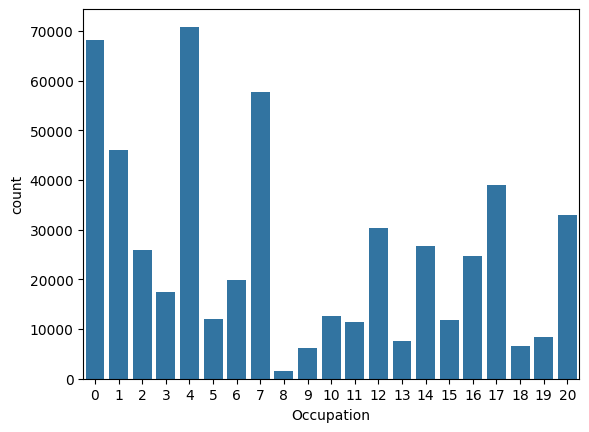

In [40]:
sns.countplot(x=df['Occupation'])

<Axes: xlabel='Occupation'>

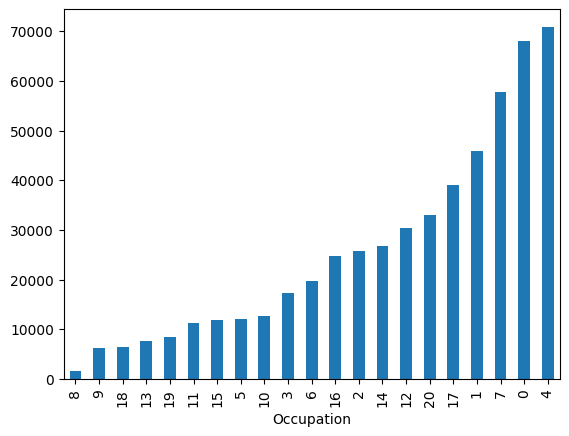

In [41]:
df.groupby('Occupation').size().sort_values().plot(kind='bar')

<Axes: xlabel='Occupation'>

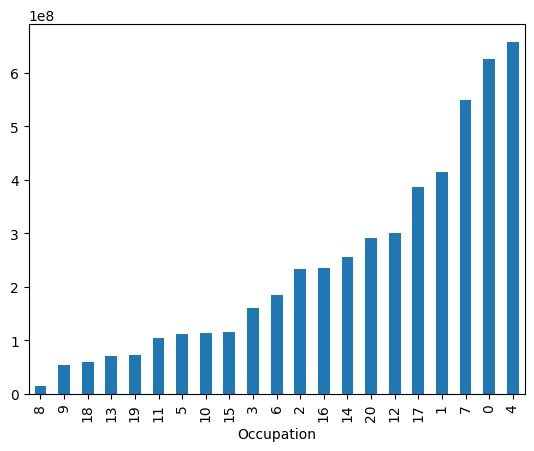

In [42]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind='bar')


<Axes: xlabel='Occupation', ylabel='count'>

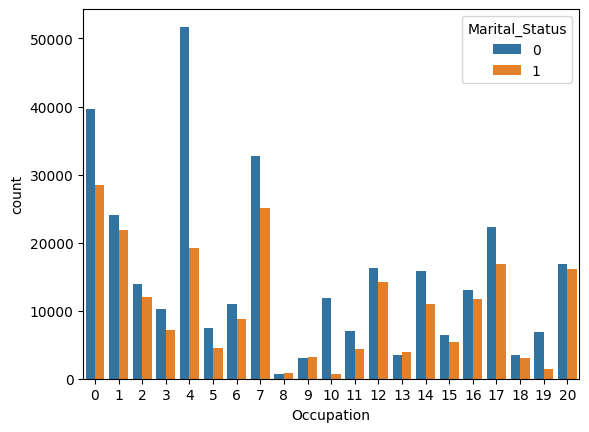

In [43]:
sns.countplot(x='Occupation',hue='Marital_Status',data=df)

<Axes: xlabel='Occupation', ylabel='count'>

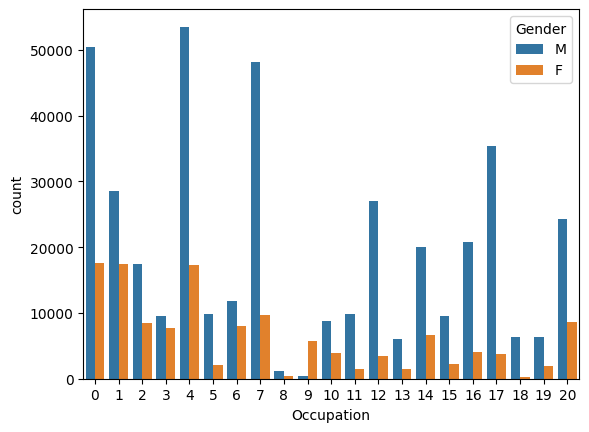

In [44]:
sns.countplot(x='Occupation',hue='Gender',data=df)


In [47]:
l = []
for i in range(len(df)):
  l.append(df['Gender'][i]+"_"+ str(df['Marital_Status'][i]))
df['MaritalGender']=l
  

In [48]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<Axes: xlabel='MaritalGender', ylabel='count'>

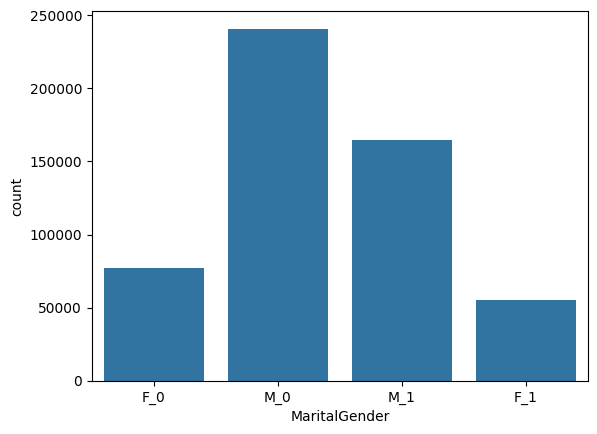

In [49]:
sns.countplot(x=df['MaritalGender'])

<Axes: xlabel='Age', ylabel='count'>

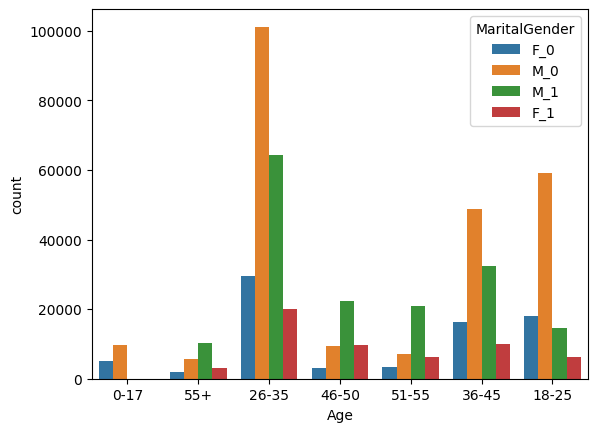

In [50]:
sns.countplot(x=df['Age'],hue=df['MaritalGender'])
